<a href="https://colab.research.google.com/github/Buntariga2545/Project/blob/main/7_TSV_Models_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_excel('/content/drive/MyDrive/Paper/Cleaned_Thermal_Data.xlsx', sheet_name='sheet_2', usecols=lambda x: 'Unnamed' not in x,)
data

,Age,BMI,Temp,RH,V,Thermal_acceptance,Thermal_sensation_Vote,อุณหภูมิ,ความชื้น,กระแสลม,...,Clo,Met,พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้,พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง,พื้นที่ทำแบบสอบถาม_ภายนอก/ มีหลังคาคลุม,พื้นที่ทำแบบสอบถาม_ภายใต้อาคาร,seasons_summer,seasons_winter,เพศ_ชาย,เพศ_หญิง
0,27,17.156262,30.5,42.9,0.13,Accept,0,2,1,2,...,0.55,1.2,0,0,1,0,0,1,1,0
1,36,23.183673,30.5,42.9,0.13,Accept,-1,3,0,5,...,0.55,1.2,0,0,1,0,0,1,1,0
2,25,38.019565,30.5,42.9,0.13,Accept,-1,2,0,4,...,0.55,1.2,0,0,1,0,0,1,0,1
3,29,27.548209,30.5,42.9,0.13,Accept,-1,3,3,4,...,0.55,1.2,0,0,1,0,0,1,1,0
4,28,33.744173,30.5,42.9,0.13,Accept,-1,2,1,4,...,0.55,1.2,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,37,27.160494,35.6,46.5,0.40,Accept,0,3,2,4,...,0.55,1.2,0,0,0,1,1,0,1,0
189,23,18.591037,35.6,46.5,0.40,Unaccept,0,3,1,4,...,0.55,1.2,0,0,0,1,1,0,0,1
190,27,16.456006,35.6,46.5,0.40,Accept,1,4,4,4,...,0.55,1.2,0,0,0,1,1,0,1,0
191,57,23.255019,35.6,46.5,0.40,Accept,1,3,1,5,...,0.55,1.2,0,0,0,1,1,0,1,0


In [26]:
data.rename(columns = {'เพศ_หญิง':'เพศหญิง','เพศ_ชาย' : 'เพศชาย', 'seasons_summer' : 'summer', 'seasons_winter' : 'winter', 'พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้' : 'ใต้ร่มไม้', 'พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง' : 'กลางแจ้ง',
                       'พื้นที่ทำแบบสอบถาม_ภายนอก/ มีหลังคาคลุม' : 'มีหลังคาคลุม', 'พื้นที่ทำแบบสอบถาม_ภายใต้อาคาร' : 'ภายใต้อาคาร', 'อุณหภูมิ' : 'ความรู้สึกถึงอุณหภูมิ', 'ความชื้น' : 'ความรู้สึกถึงความชื้น',
                       'กระแสลม' : 'ความรู้สึกถึงกระแสลม','ความแรงของแสงแดด' : 'ความรู้สึกถึงแสงแดด','เหงื่อบริเวณผิวหนัง' : 'ความรู้สึกถึงเหงื่อ', 'ความร้อน' : 'ความต้องการอุณหภูมิ','ความชื้น.1' : 'ความต้องการความชื้น', 'กระแสลม.1': 'ความต้องการกระแสลม', 'แสงแดด' : 'ความต้องการแสงแดด',
                       'เหงื่อบริเวณผิวหนัง.1': 'ความต้องการเหงื่อ'}, inplace = True)
data

,Age,BMI,Temp,RH,V,Thermal_acceptance,Thermal_sensation_Vote,ความรู้สึกถึงอุณหภูมิ,ความรู้สึกถึงความชื้น,ความรู้สึกถึงกระแสลม,...,Met,ใต้ร่มไม้,กลางแจ้ง,มีหลังคาคลุม,ภายใต้อาคาร,summer,winter,เพศชาย,เพศหญิง,TSV7
0,27,17.156262,30.5,42.9,0.13,Accept,0,2,1,2,...,1.2,0,0,1,0,0,1,1,0,2
1,36,23.183673,30.5,42.9,0.13,Accept,-1,3,0,5,...,1.2,0,0,1,0,0,1,1,0,1
2,25,38.019565,30.5,42.9,0.13,Accept,-1,2,0,4,...,1.2,0,0,1,0,0,1,0,1,1
3,29,27.548209,30.5,42.9,0.13,Accept,-1,3,3,4,...,1.2,0,0,1,0,0,1,1,0,1
4,28,33.744173,30.5,42.9,0.13,Accept,-1,2,1,4,...,1.2,0,0,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,37,27.160494,35.6,46.5,0.40,Accept,0,3,2,4,...,1.2,0,0,0,1,1,0,1,0,2
189,23,18.591037,35.6,46.5,0.40,Unaccept,0,3,1,4,...,1.2,0,0,0,1,1,0,0,1,2
190,27,16.456006,35.6,46.5,0.40,Accept,1,4,4,4,...,1.2,0,0,0,1,1,0,1,0,3
191,57,23.255019,35.6,46.5,0.40,Accept,1,3,1,5,...,1.2,0,0,0,1,1,0,1,0,3


#Spitt data

##TSV 7

In [27]:
fo_mapping = {
    -2 :0,
    -1 :1,
    0 : 2,
    1 : 3,
    2 : 4,
    3 : 5,
}

data['TSV7'] = data['Thermal_sensation_Vote'].map(fo_mapping)

In [28]:
data.TSV7.value_counts()

2    59
3    53
1    39
4    22
5    16
0     4
Name: TSV7, dtype: int64

###แบ่งข้อมูลโดยใช้ 5-fold แล้วจัดการ imbalance class ด้วย smote (TSV7)

In [29]:
X = data.drop(['Thermal_acceptance','Thermal_sensation_Vote', 'TSV7'], axis = 1)
#y = data['Thermal_acceptance']
y2 = data['TSV7']

In [30]:
import numpy as np
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# วนลูปผ่าน K-Fold
for train_index, test_index in kf.split(X):
    # แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y2_train, y2_test = y2.iloc[train_index], y2.iloc[test_index]

    # ทำมาตรฐานข้อมูล
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns = X.columns)

    # ใช้ SMOTE สำหรับการทำ resampling ข้อมูลชุดฝึก
    smote = SMOTE(k_neighbors=2, random_state=42)
    X_train_res, y2_train_res = smote.fit_resample(X_train_scaled, y2_train)


    print(f"Training set size after resampling: {X_train_res.shape}")
    print(f"Test set size: {X_test_scaled.shape}")

Training set size after resampling: (270, 26)
Test set size: (39, 26)
Training set size after resampling: (306, 26)
Test set size: (39, 26)
Training set size after resampling: (288, 26)
Test set size: (39, 26)
Training set size after resampling: (270, 26)
Test set size: (38, 26)
Training set size after resampling: (288, 26)
Test set size: (38, 26)


In [31]:
data.TSV7.value_counts()

2    59
3    53
1    39
4    22
5    16
0     4
Name: TSV7, dtype: int64

##SVM

In [22]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

#mean_squared_error(actual_values, predicted_values)
# taking root of mean squared error
#root_mean_squared_error = sqrt(mean_squared_error)

###TSV 7 ค่า

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
svm_grid = GridSearchCV(SVC(), param_grid, cv=5, refit=True, verbose=0)
svm_grid.fit(X_train_res, y2_train_res)
print("best_params :",svm_grid.best_params_)
print("accuracy :",svm_grid.best_score_)

best_params : {'C': 150, 'gamma': 0.01, 'kernel': 'rbf'}
accuracy : 0.7916515426497277


In [48]:
svm = SVC(C= 100, gamma= 0.1, kernel='rbf')

svm_pred = svm.fit(X_train_res, y2_train_res)

# Make predictions on the test set
y_pred = svm.predict(X_test_scaled)
#print(confusion_matrix(y3_test,y_pred))
#print(classification_report(y_test,y_pred))

print('MSE_train:', format(mean_squared_error(y2_train_res, svm_pred.predict(X_train_res))))
print('MSE_test:', format(mean_squared_error(y2_test, svm_pred.predict(X_test_scaled))))

print('MAE_train:', format(mean_absolute_error(y2_train_res, svm_pred.predict(X_train_res))))
print('MAE_test:', format(mean_absolute_error(y2_test, svm_pred.predict(X_test_scaled))))

MSE_train: 0.0
MSE_test: 0.6578947368421053
MAE_train: 0.0
MAE_test: 0.5526315789473685


X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names


###Plot SVM

TSV 7 ค่า

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


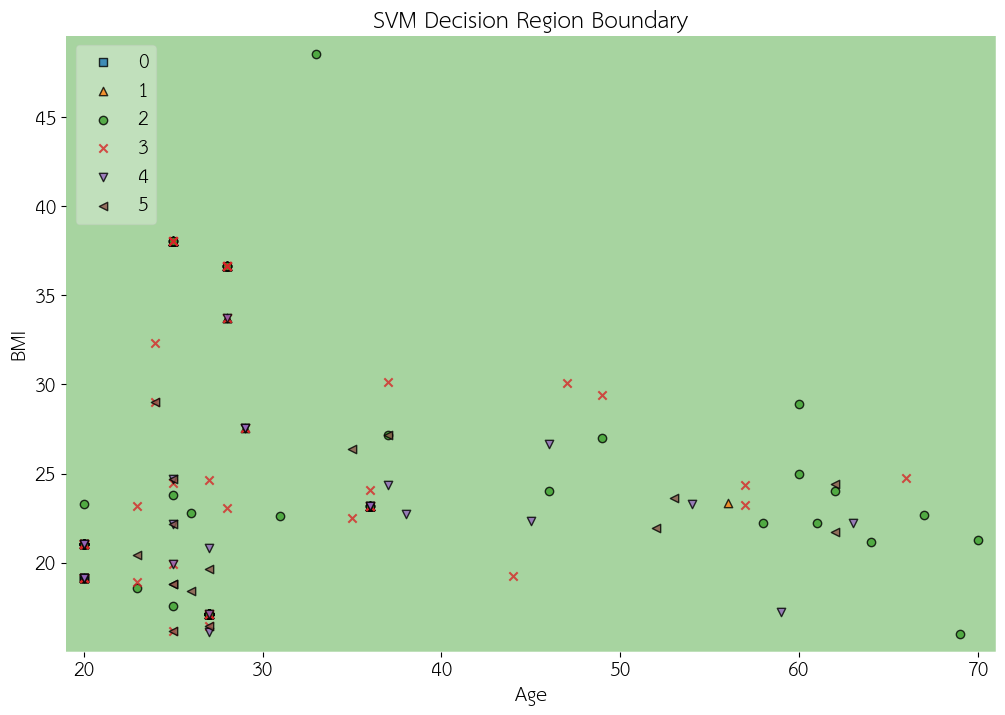

In [ ]:
import numpy as np
import pandas as pd
from sklearn import svm
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Fit Support Vector Machine Classifier
X = data[['Age', 'BMI']]
y = data['TSV7']

clf = svm.SVC(C= 100, gamma= 0.01, kernel='sigmoid')
clf.fit(X, y)

# Plot Decision Region using mlxtend's awesome plotting function
plot_decision_regions(X=X.values,
                      y=y.values,
                      clf=clf,
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names


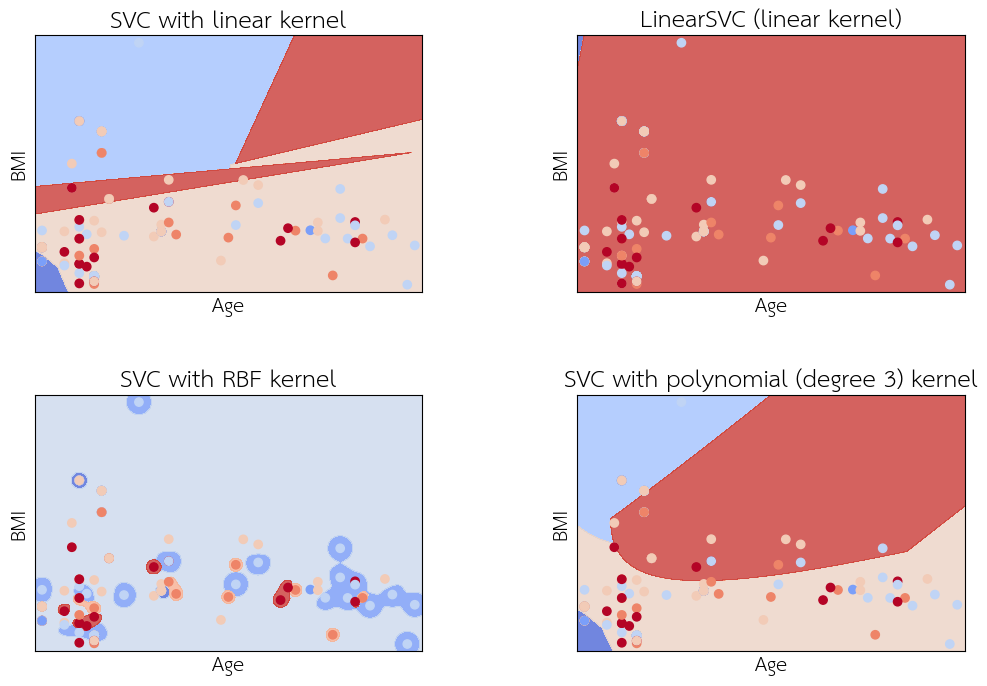

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

X = data[['Age', 'BMI']]
y = data['TSV7']
h = .02  # step size in the mesh

C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
#x_min, x_max = X.min() - 1, X.max() + 1
#y_min, y_max = X.min() - 1, X.max() + 1
#xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

x_min, x_max = X['Age'].min() - 1, X['Age'].max() + 1
y_min, y_max = X['BMI'].min() - 1, X['BMI'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X['Age'], X['BMI'], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Age')
    plt.ylabel('BMI')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py

Best parameters for SVM: {'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        39
           2       0.31      1.00      0.47        59
           3       0.00      0.00      0.00        53
           4       0.00      0.00      0.00        22
           5       0.00      0.00      0.00        16

    accuracy                           0.31       193
   macro avg       0.05      0.17      0.08       193
weighted avg       0.09      0.31      0.14       193



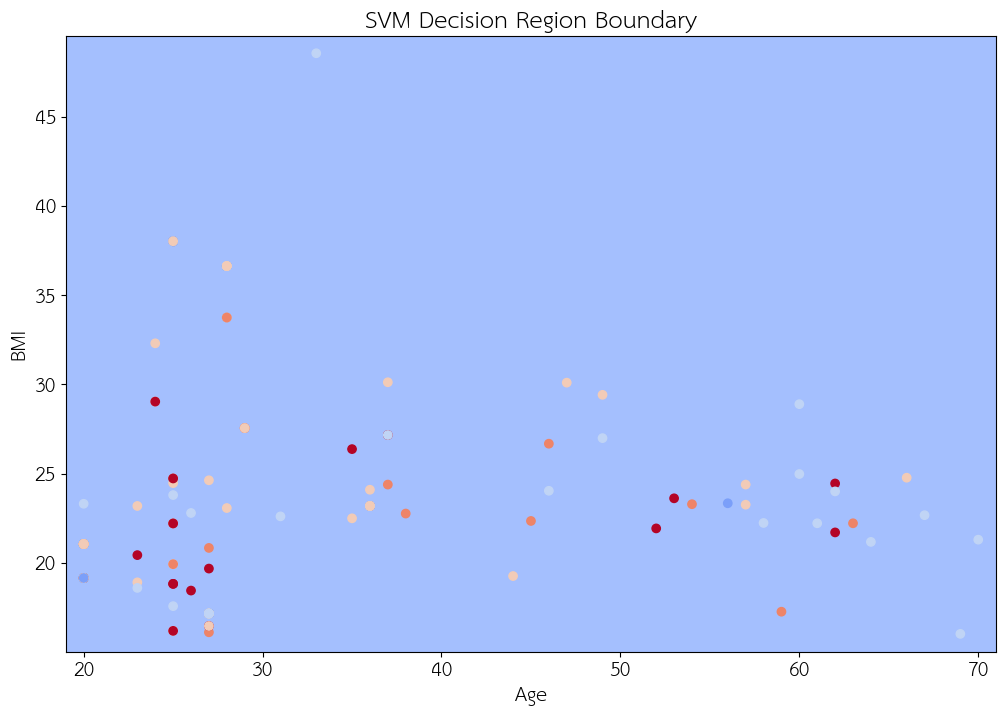

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

X = data[['Age', 'BMI']]
y = data['TSV7']

# แบ่งข้อมูลเป็น Train set และ Test set
#X_train, X_test, y_train, y_test = train_test_split(X, y3, test_size=0.3, random_state=0)

# กำหนดพารามิเตอร์ที่เป็นไปได้ของ SVM
param_grid = [{'C': [100], 'gamma': [0.01], 'kernel': ['sigmoid']}]

# สร้าง Grid Search object สำหรับ SVM
svm_grid_search = GridSearchCV(SVC(random_state=0), param_grid, cv=5)

# ปรับพารามิเตอร์ของ SVM ด้วย Grid Search
svm_grid_search.fit(X, y)

# แสดงค่าพารามิเตอร์ที่ดีที่สุดสำหรับ SVM
print('Best parameters for SVM:', svm_grid_search.best_params_)

# ทำนายผลการจัดกลุ่มสำหรับ Test set ด้วยโมเดล SVM ที่ดีที่สุด
y_pred = svm_grid_search.predict(X)

# แสดงผลการทดสอบ
print(classification_report(y, y_pred))

# แสดง Decision boundary ของโมเดล SVM ที่ดีที่สุด
svc = svm_grid_search.best_estimator_
svc.fit(X, y)

x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X['Age'], X['BMI'], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('SVM Decision Region Boundary')
plt.show()

#cmap=plt.cm.RdYlBu

###SHAP

In [35]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 5.8 MB/s eta 0:00:00


In [ ]:
import shap

# SHAP Interpreter
shapExplainer = shap.TreeExplainer(svm_pred)
shapValues = shapExplainer.shap_values(X)

# Explainer details
shapExplainer.__dict__

# Summary features contribute in model
shap.summary_plot(shapValues, X, plot_type = 'bar')

###PDP

In [41]:
from sklearn.inspection import PartialDependenceDisplay

In [42]:
base_features = ['อุณหภูมิ', 'TMRT', 'Temp', 'เพศ_ชาย', 'Age']

In [ ]:
n_cols = len(base_features)  # จำนวนคอลัมน์ตามจำนวน features
fig, axs = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols * 3, 3))  # ปรับขนาดให้เหมาะสม

for i, bf in enumerate(base_features):
    PartialDependenceDisplay.from_estimator(
        svm_pred,
        X_train_res,
        features=[bf],
        feature_names=base_features,
        grid_resolution = 10,
        ax=axs[i]  # ใช้ axis ที่ i
    )
    axs[i].set_title("Partial Dependency Plot")

plt.tight_layout()
plt.show()

ValueError: target must be specified for multi-class

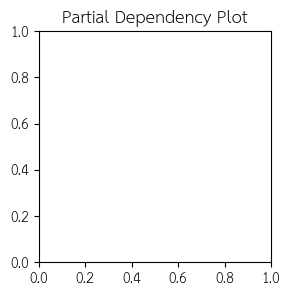

In [43]:
for bf in base_features:
      fig, ax = plt.subplots(figsize=(3, 3))
      ax.set_title("Partial Dependency Plot")
      PartialDependenceDisplay.from_estimator(svm_pred,
                                        X_train_res,
                                        features = [bf],
                                        feature_names = base_features,
                                        grid_resolution = 10,
                                        ax = ax)
      plt.show()

##SVR

###TSV 7 ค่า

In [50]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVC
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

In [51]:
#GridSearchCV for SVR
from sklearn.svm import SVR

C = np.array([0.001, 0.01, 0.1, 1, 10])
epsilon = [0, 0.01, 0.1, 0.5, 1, 2, 4, 5]
space = [{'kernel': ['linear'], 'C' : C, 'epsilon' : epsilon},
         {'kernel': ['rbf'], 'C' : C, 'gamma' : C, 'epsilon' : epsilon}]

gs = GridSearchCV(SVR(), param_grid = space, scoring = 'r2', cv = 10, n_jobs = -1)
ge_results = gs.fit(X_train_res, y2_train_res)
print("Best parameters :", ge_results.best_score_)
print("Best accuracy :", ge_results.best_params_)
print('R_Square:', format(ge_results.best_score_))
print('Best parameters:', format(ge_results.best_params_))

Best parameters : 0.6980019013317346
Best accuracy : {'C': 10.0, 'epsilon': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
R_Square: 0.6980019013317346
Best parameters: {'C': 10.0, 'epsilon': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}


In [52]:
svr_reg = SVR(C = 1, kernel = 'linear', epsilon = 0)

# Train the model
results = svr_reg.fit(X_train_res, y2_train_res)

# Make predictions on the test set
y_pred = svr_reg.predict(X_test_scaled)

print('MSE_train: {:.15f}'. format(mean_squared_error(y2_train_res, results.predict(X_train_res))))
print('MSE_test: {:.15f}'. format(mean_squared_error(y2_test, results.predict(X_test_scaled))))

print('MAE_train: {:.15f}'. format(mean_absolute_error(y2_train_res, results.predict(X_train_res))))
print('MAE_test: {:.15f}'. format(mean_absolute_error(y2_test, results.predict(X_test_scaled))))

MSE_train: 0.366422533420935
MSE_test: 0.972061377645347
MAE_train: 0.420505331628181
MAE_test: 0.733986592723169


X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names


###SHAP

In [64]:
import shap

In [ ]:
# SHAP Interpreter
shapExplainer = shap.TreeExplainer(results)
shapValues = shapExplainer.shap_values(X)

# Explainer details
shapExplainer.__dict__

# Summary features contribute in model
shap.summary_plot(shapValues, X, plot_type = 'bar')

###PDP

In [54]:
base_features = ['อุณหภูมิ', 'TMRT', 'Temp', 'เพศ_ชาย', 'Age']

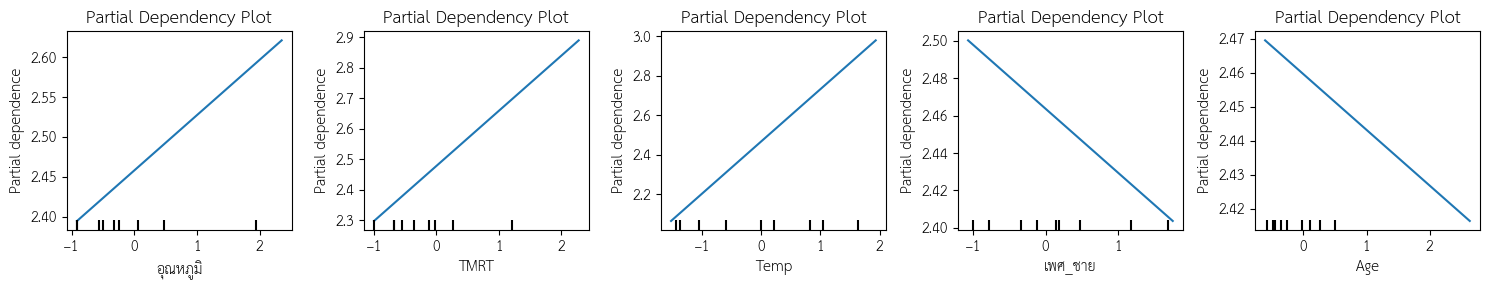

In [55]:
n_cols = len(base_features)  # จำนวนคอลัมน์ตามจำนวน features
fig, axs = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols * 3, 3))  # ปรับขนาดให้เหมาะสม

for i, bf in enumerate(base_features):
    PartialDependenceDisplay.from_estimator(
        results,
        X_train_res,
        features=[bf],
        feature_names=base_features,
        grid_resolution = 10,
        ax=axs[i]  # ใช้ axis ที่ i
    )
    axs[i].set_title("Partial Dependency Plot")

plt.tight_layout()
plt.show()

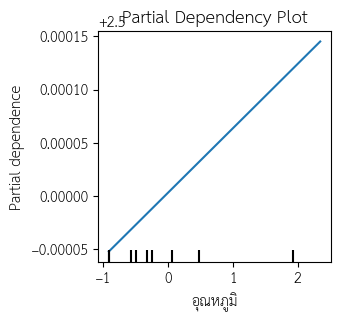

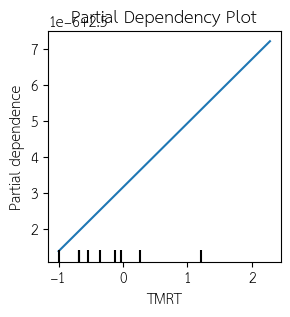

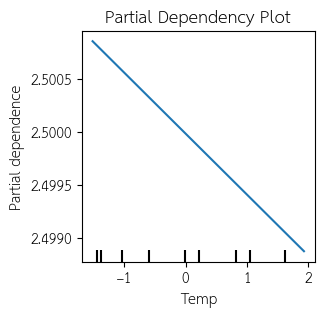

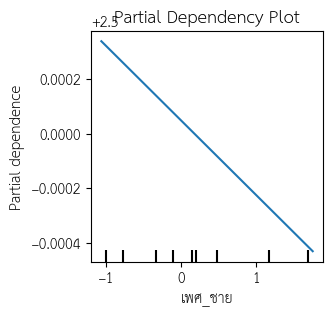

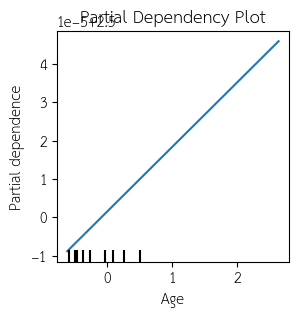

In [ ]:
for bf in base_features:
      fig, ax = plt.subplots(figsize=(3, 3))
      ax.set_title("Partial Dependency Plot")
      PartialDependenceDisplay.from_estimator(results,
                                        X_train_res,
                                        features = [bf],
                                        feature_names = base_features,
                                        grid_resolution = 10,
                                        ax = ax)
      plt.show()

##XGBOOST

###TSV 7 ค่า

In [ ]:
import xgboost as xgb

param_dist = {
    'max_depth': [5, 9, 10, 14],
    'subsample': [1, 0.8, 0.6, 0.3],
    'colsample_bytree': [1, 0.8, 0.6, 0.3]
}

In [ ]:
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score

#Creating an XGBoost regressor
model = xgb.XGBRegressor()
xgbr = GridSearchCV(model, param_dist)

#Training the model on the training data
xgb_reg = xgbr.fit(X_train_res, y2_train_res)

print("Best parameters :", xgb_reg.best_score_)
print("Best accuracy :", xgb_reg.best_params_)

Best parameters : 0.663068183954689
Best accuracy : {'colsample_bytree': 0.6, 'max_depth': 14, 'subsample': 0.8}


In [ ]:
#Making predictions on the test set
predictions = xgbr.predict(X_test_scaled)

xgb_reg = xgb.XGBRegressor(colsample_bytree = 1, max_depth = 5, subsample = 1)

# Train the model
result = xgb_reg.fit(X_train_res, y2_train_res)

# Make predictions on the test set
y_pred = xgb_reg.predict(X_test_scaled)

# Calculate the mean squared error and R-squared score
mse_train = mean_squared_error(y2_train_res, xgb_reg.predict(X_train_res))
r2_train = r2_score(y2_train_res, xgb_reg.predict(X_train_res))
mae_train = mean_absolute_error(y2_train_res, xgb_reg.predict(X_train_res))

mse_test = mean_squared_error(y2_test, predictions)
r2_test = r2_score(y2_test, predictions)
mae_test = mean_absolute_error(y2_test, predictions)

print("Mean Squared Error: {:.15f}". format(mse_train))
print("R-squared Score: {:.15f}". format(r2_train))
print("Mean Absolute Error: {:.15f}". format(mae_train))

print("Mean Squared Error: {:.15f}". format(mse_test))
print("R-squared Score: {:.15f}". format(r2_test))
print("Mean Absolute Error: {:.15f}". format(mae_test))

Mean Squared Error: 0.000019082296623
R-squared Score: 0.999993457498301
Mean Absolute Error: 0.002701034912990
Mean Squared Error: 0.556707229142572
R-squared Score: 0.654688471270673
Mean Absolute Error: 0.563653007933968


###Plot XGBOOST

TSV 7 ค่า

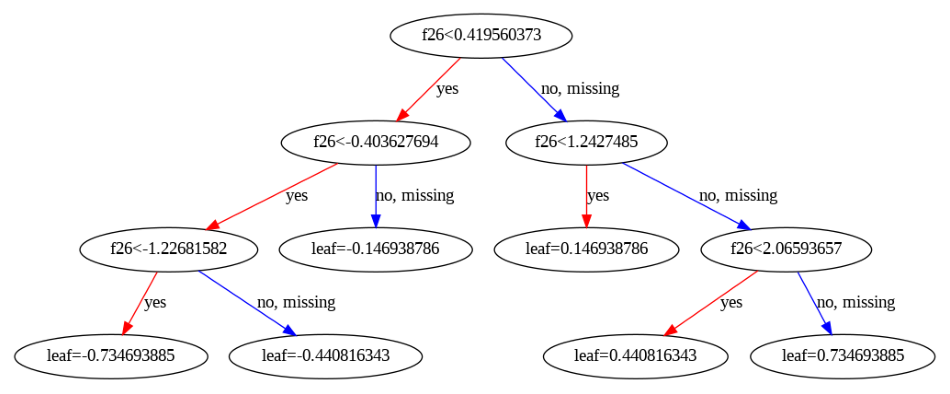

In [ ]:
# plot decision tree
import xgboost as xgb
from xgboost import plot_tree
import matplotlib.pyplot as plt

# fit model no training data
model = xgb.XGBRegressor()
xgb_reg = model.fit(X_train_res, y2_train_res)
# plot single tree
plot_tree(xgb_reg)
plt.show()

###SHAP

[18:49:40] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


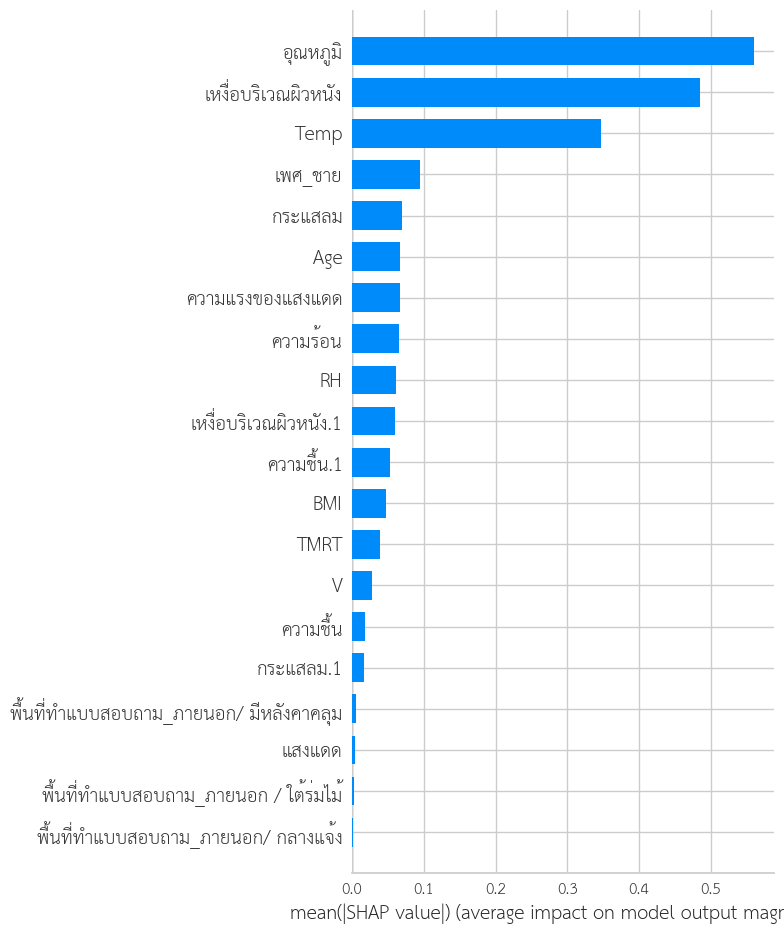

In [ ]:
# SHAP Interpreter
shapExplainer = shap.TreeExplainer(result)
shapValues = shapExplainer.shap_values(X_train_res)

# Explainer details
shapExplainer.__dict__

# Summary features contribute in model
shap.summary_plot(shapValues, X_train_res, plot_type = 'bar')

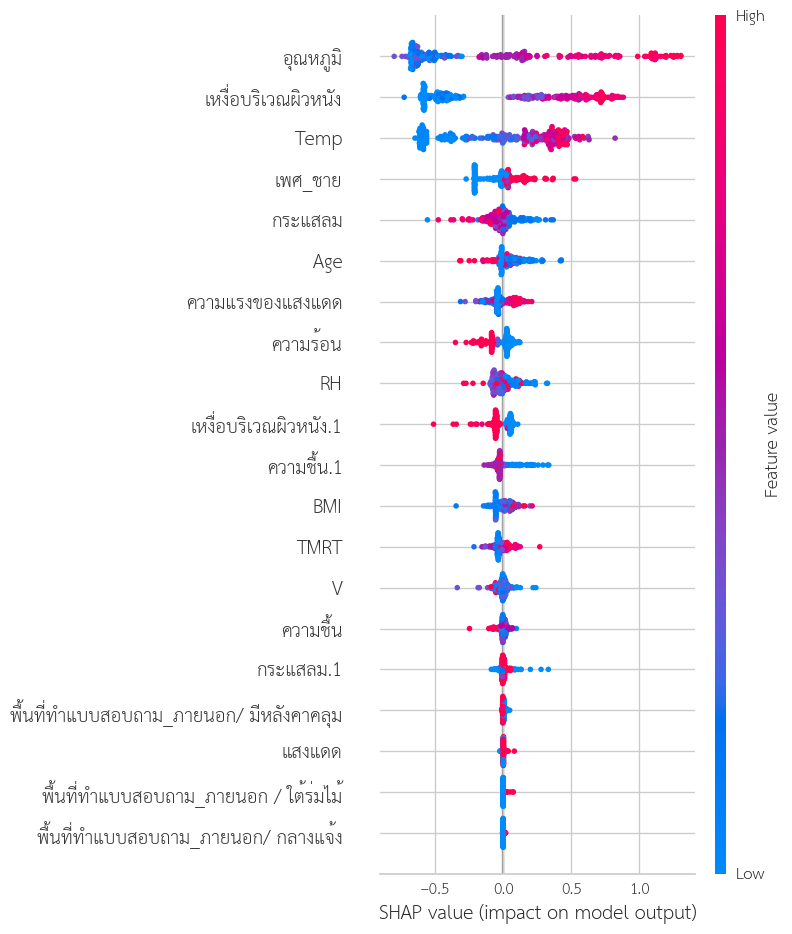

In [ ]:
shap.summary_plot(shapValues, X_train_res)

###PDP

<Axes: >

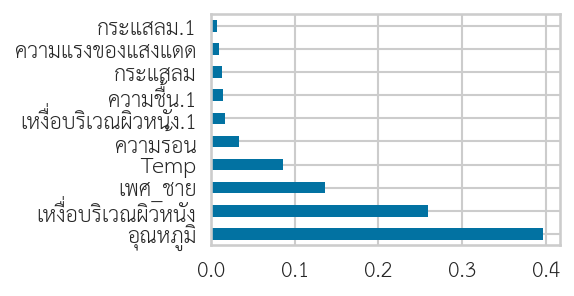

In [ ]:
fig, ax = plt.subplots(figsize=(3, 2), dpi=150)
pd.Series(result.feature_importances_, index=X_train_res.columns)\
    .nlargest(10)\
    .plot(kind='barh', ax=ax)

In [ ]:
base_features = ['อุณหภูมิ', 'เหงื่อบริเวณผิวหนัง', 'Temp']

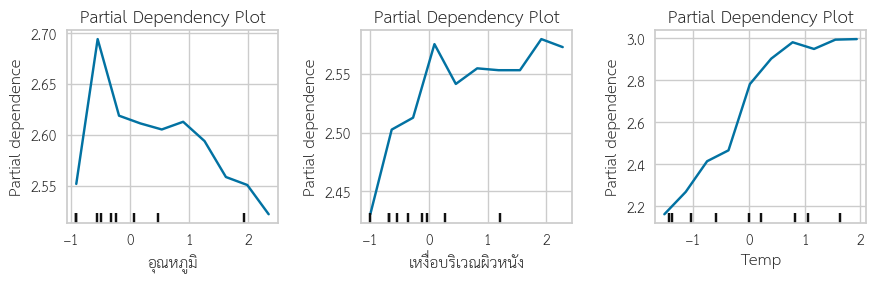

In [ ]:
n_cols = len(base_features)  # จำนวนคอลัมน์ตามจำนวน features
fig, axs = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols * 3, 3))  # ปรับขนาดให้เหมาะสม

for i, bf in enumerate(base_features):
    PartialDependenceDisplay.from_estimator(
        result,
        X_train_res,
        features=[bf],
        feature_names=base_features,
        grid_resolution = 10,
        ax=axs[i]  # ใช้ axis ที่ i
    )
    axs[i].set_title("Partial Dependency Plot")

plt.tight_layout()
plt.show()

##regression

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# mean_squared_error module for applying RMSE
from sklearn.metrics import mean_squared_error as mse

###Lasso

###TSV 7 ค่า

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LassoCV

# Create an instance of Lasso Regression implementation
lasso_cv = LassoCV(cv=5)

# Fit the Lasso model
lasso_cv.fit(X_train_res, y2_train_res)

LassoCV(cv=5)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Perform grid search with cross-validation
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5)
lasso_cv.fit(X_train_res, y2_train_res)

# Print best parameter values and score
print("Best Parameters:", lasso_cv.best_params_)
print("Best Score:", lasso_cv.best_score_)

print("Best parameters :", lasso_cv.best_params_)
print("Best accuracy :", lasso_cv.best_score_)
print('R_Square:', format(lasso_cv.best_score_))
print('Best parameters:', format(lasso_cv.best_params_))

Best Parameters: {'alpha': 0.01}
Best Score: 0.176356497387734
Best parameters : {'alpha': 0.01}
Best accuracy : 0.176356497387734
R_Square: 0.176356497387734
Best parameters: {'alpha': 0.01}


In [ ]:
lassoo = Lasso()
lasso.fit(X_train_res, y2_train_res)

Lasso(alpha=0.001)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Fit Lasso regression model
lasso = Lasso(alpha=0.001)
lasso_reg = lasso.fit(X_train_res, y2_train_res)

# Evaluate model performance on test set
y_pred = lasso.predict(X_test_scaled)

# Model Score
print("Model Score: ", lasso.score(X_test_scaled, y2_test))

# Lasso Coefficient
lasso.coef_

print('MSE_train: {:.15f}'. format(mean_squared_error(y2_train_res, lasso_reg.predict(X_train_res))))
print('MSE_test: {:.15f}'. format(mean_squared_error(y2_test, lasso_reg.predict(X_test_scaled))))

print('MAE_train: {:.15f}'. format(mean_absolute_error(y2_train_res, lasso_reg.predict(X_train_res))))
print('MAE_test: {:.15f}'. format(mean_absolute_error(y2_test, lasso_reg.predict(X_test_scaled))))

Model Score:  0.4782435496309435
MSE_train: 0.334670729636435
MSE_test: 0.841169678988341
MAE_train: 0.449656383157231
MAE_test: 0.692859302120430


X does not have valid feature names, but Lasso was fitted with feature names
X does not have valid feature names, but Lasso was fitted with feature names
X does not have valid feature names, but Lasso was fitted with feature names
X does not have valid feature names, but Lasso was fitted with feature names


###SHAP

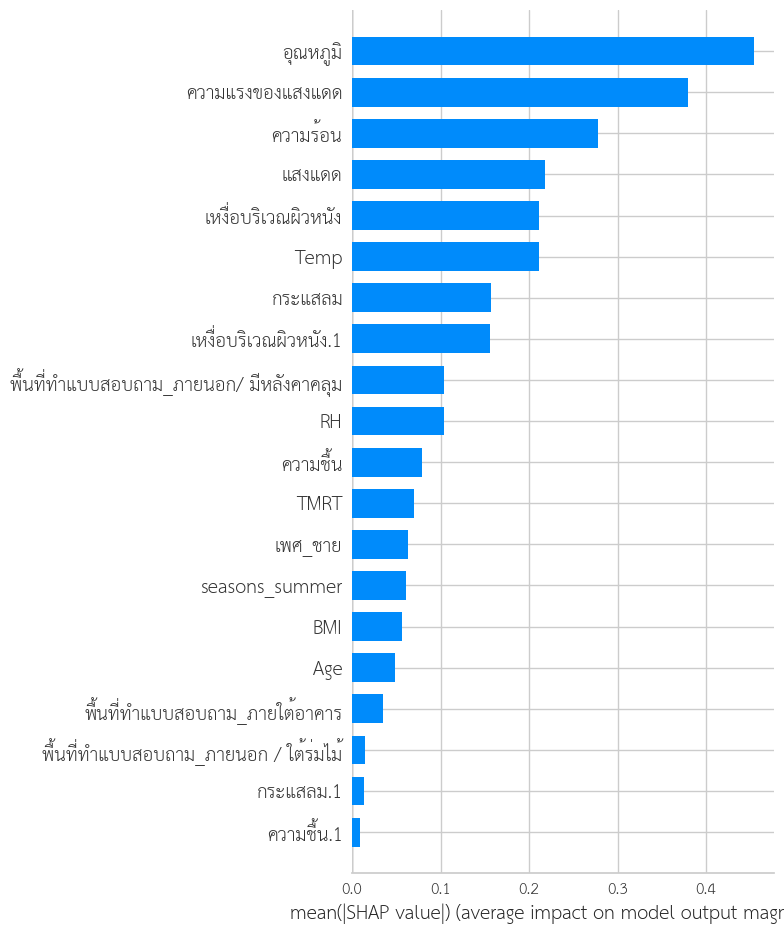

In [ ]:
masker = shap.maskers.Independent(data = X_train_res)
# SHAP Interpreter
shapExplainer = shap.LinearExplainer(lasso_reg,masker=masker)
shapValues = shapExplainer.shap_values(X_train_res)

# Explainer details
shapExplainer.__dict__

# Summary features contribute in model
#shap.summary_plot(shapValues, X_train_res, plot_type = 'bar')
class_names = [0,1]
shap.summary_plot(shapValues, X_train_res.values, plot_type = 'bar', class_names= class_names, feature_names = X_train_res.columns)

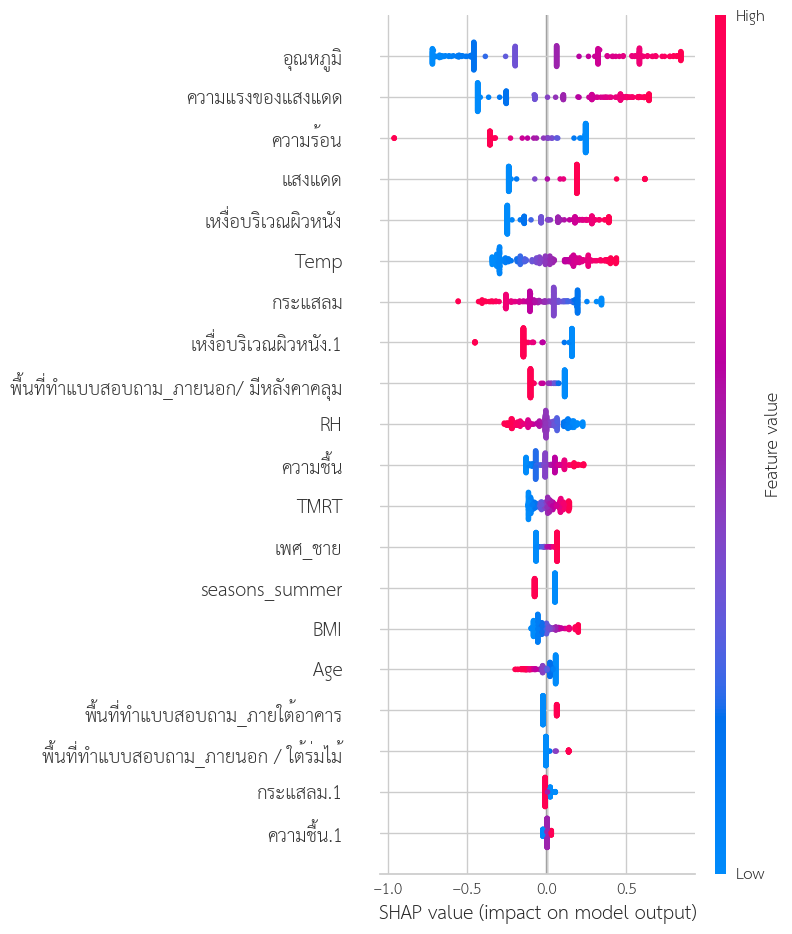

In [ ]:
shap.summary_plot(shapValues, X_train_res)

###PDP

X does not have valid feature names, but Lasso was fitted with feature names


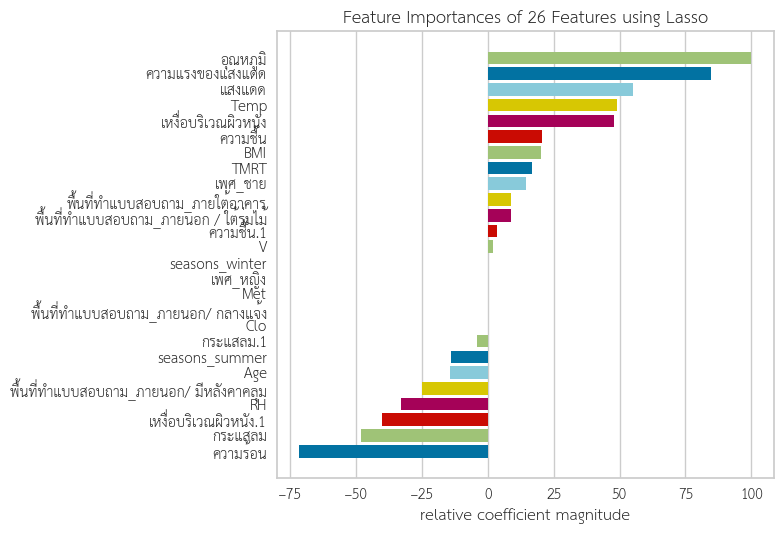

<Axes: title={'center': 'Feature Importances of 26 Features using Lasso'}, xlabel='relative coefficient magnitude'>

In [ ]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(lasso_reg)
viz.fit(X, y2)
viz.show()

In [ ]:
base_features = ['อุณหภูมิ', 'ความแรงของแสงแดด', 'ความร้อน']

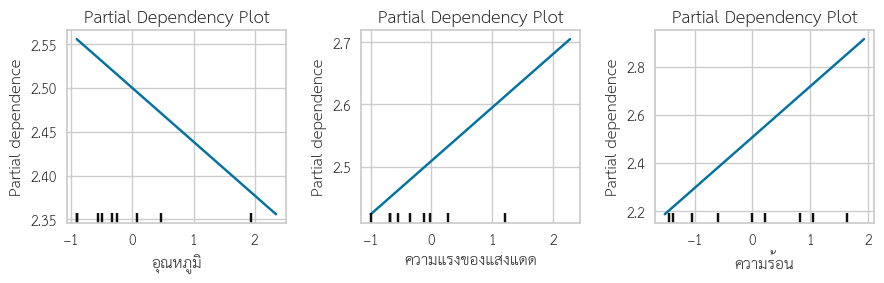

In [ ]:
n_cols = len(base_features)  # จำนวนคอลัมน์ตามจำนวน features
fig, axs = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols * 3, 3))  # ปรับขนาดให้เหมาะสม

for i, bf in enumerate(base_features):
    PartialDependenceDisplay.from_estimator(
        lasso_reg,
        X_train_res,
        features=[bf],
        feature_names=base_features,
        grid_resolution = 10,
        ax=axs[i]  # ใช้ axis ที่ i
    )
    axs[i].set_title("Partial Dependency Plot")

plt.tight_layout()
plt.show()

###Multiple Linear Regression

###TSV 7 ค่า

In [56]:
from sklearn import datasets, linear_model, metrics

In [57]:
#X = data.drop(['Thermal_acceptance', 'Thermal_sensation_Vote', 'TSV3'], axis =1)
#y3 = data['TSV3']

#regr = linear_model.LinearRegression()
#regr.fit(X, y3)

#print(regr.coef_)

In [58]:
features = X.columns
features

Index(['Age', 'BMI', 'Temp', 'RH', 'V', 'ความรู้สึกถึงอุณหภูมิ',
       'ความรู้สึกถึงความชื้น', 'ความรู้สึกถึงกระแสลม', 'ความรู้สึกถึงแสงแดด',
       'ความรู้สึกถึงเหงื่อ', 'ความต้องการอุณหภูมิ', 'ความต้องการความชื้น',
       'ความต้องการกระแสลม', 'ความต้องการแสงแดด', 'ความต้องการเหงื่อ', 'TMRT',
       'Clo', 'Met', 'ใต้ร่มไม้', 'กลางแจ้ง', 'มีหลังคาคลุม', 'ภายใต้อาคาร',
       'summer', 'winter', 'เพศชาย', 'เพศหญิง'],
      dtype='object')

In [59]:
regr = linear_model.LinearRegression()

parameters = {
    'copy_X': [True, False],
    'fit_intercept' : [True, False],
    'n_jobs' : [1,2,3],
    'positive' : [True, False]
}

model_cv = GridSearchCV(regr, parameters,)

model_cv.fit(X_train_res, y2_train_res)

print("Best parameters :", model_cv.best_score_)
print("Best accuracy :", model_cv.best_params_)

Best parameters : 0.144368075745259
Best accuracy : {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}


In [60]:
reg = linear_model.LinearRegression(copy_X = True, fit_intercept = True, n_jobs = 1, positive = True)

reg_reg = reg.fit(X_train_res, y2_train_res)

y_pred = reg.predict(X_test_scaled)

print('MSE_train:', format(mean_squared_error(y2_train_res, reg_reg.predict(X_train_res))))
print('MSE_test:', format(mean_squared_error(y2_test, reg_reg.predict(X_test_scaled))))

print('MAE_train: {:.20f}'. format(mean_absolute_error(y2_train_res, reg_reg.predict(X_train_res))))
print('MAE_test: {:.20f}'. format(mean_absolute_error(y2_test, reg_reg.predict(X_test_scaled))))

MSE_train: 0.4222901996933986
MSE_test: 0.7051168865691632
MAE_train: 0.49423431496975223087
MAE_test: 0.65871082485705534371


X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names


###SHAP

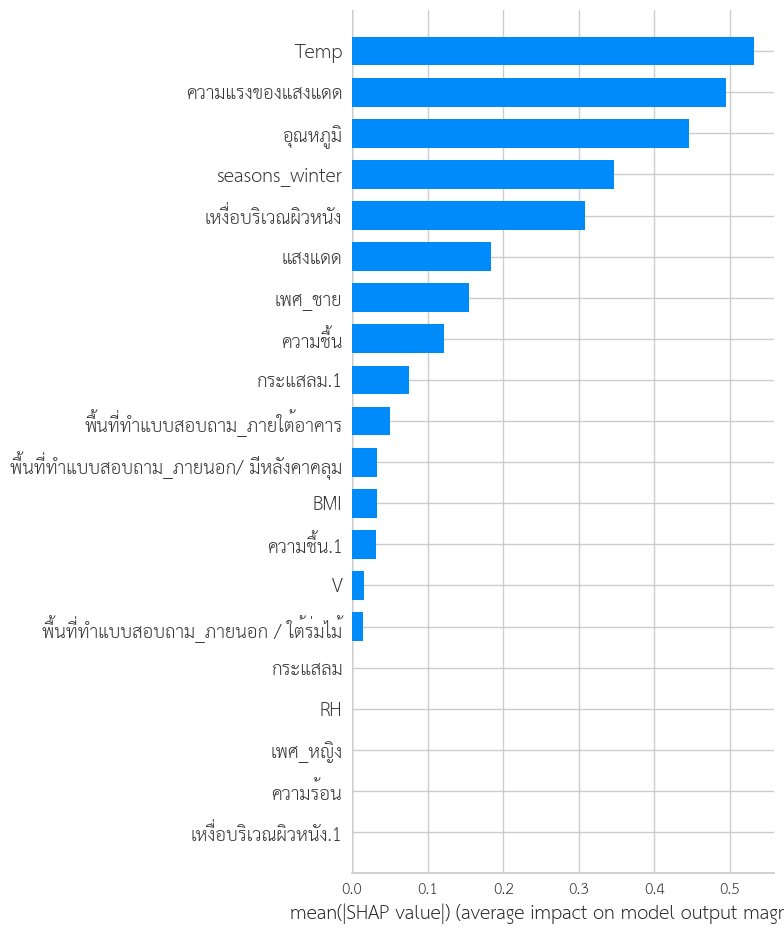

In [ ]:
masker = shap.maskers.Independent(data = X_train_res)
# SHAP Interpreter
shapExplainer = shap.LinearExplainer(reg_reg,masker=masker)
shapValues = shapExplainer.shap_values(X_train_res)

# Explainer details
shapExplainer.__dict__

# Summary features contribute in model
#shap.summary_plot(shapValues, X_train_res, plot_type = 'bar')
class_names = [0,1]
shap.summary_plot(shapValues, X_train_res.values, plot_type = 'bar', class_names= class_names, feature_names = X_train_res.columns)

###PDP

In [ ]:
fig, ax = plt.subplots(figsize=(3, 2), dpi=150)
pd.Series(reg_reg.feature_importances_, index=X.columns)\
    .nlargest(10)\
    .plot(kind='barh', ax=ax)

In [63]:
base_features = ['อุณหภูมิ', 'TMRT', 'Temp', 'เพศ_ชาย', 'Age']

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
Attempting to set identical low and high ylims makes transformation singular; automatically expanding.


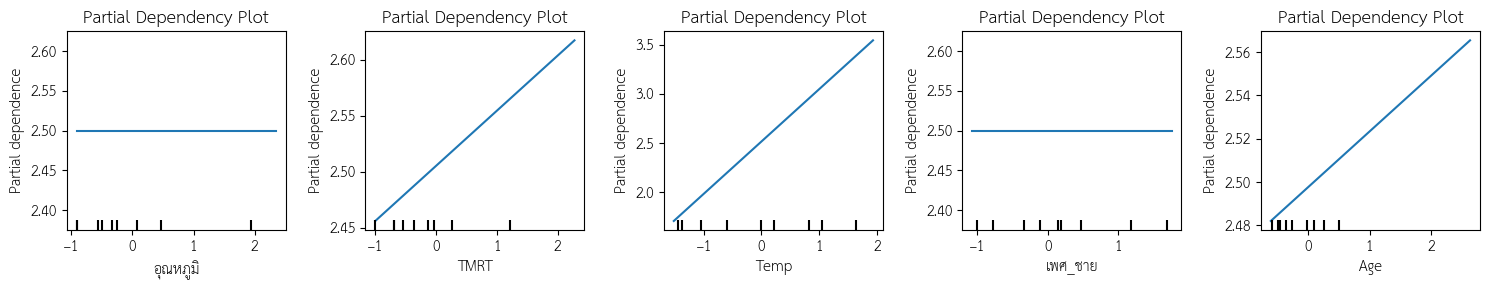

In [62]:
n_cols = len(base_features)  # จำนวนคอลัมน์ตามจำนวน features
fig, axs = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols * 3, 3))  # ปรับขนาดให้เหมาะสม

for i, bf in enumerate(base_features):
    PartialDependenceDisplay.from_estimator(
        reg_reg,
        X_train_res,
        features=[bf],
        feature_names=base_features,
        grid_resolution = 10,
        ax=axs[i]  # ใช้ axis ที่ i
    )
    axs[i].set_title("Partial Dependency Plot")

plt.tight_layout()
plt.show()

##Random Forest

In [ ]:
import os
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

###TSV 7 ค่า

In [ ]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [1,2,3,4]
}
regr = RandomForestRegressor(random_state=0)

clf = GridSearchCV(regr, parameters)
clf.fit(X_train_res, y2_train_res)

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
`max

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [ ]:
print("Best parameters :", clf.best_score_)
print("Best accuracy :", clf.best_params_)

Best parameters : 0.3862065815112338
Best accuracy : {'max_depth': 4, 'max_features': 'auto', 'n_estimators': 250}


In [ ]:
rdf_reg = RandomForestRegressor(max_depth = 3, max_features = 'auto', n_estimators = 100)

# Train the model
resultss = rdf_reg.fit(X_train_res, y2_train_res)

# Make predictions on the test set
y_pred = rdf_reg.predict(X_test_scaled)
#print(confusion_matrix(y3_test,y_pred))
#print(classification_report(y3_test,y_pred))
print('MSE_train:', format(mean_squared_error(y2_train_res, resultss.predict(X_train_res))))
print('MSE_test:', format(mean_squared_error(y2_test, resultss.predict(X_test_scaled))))

print('MAE_train:', format(mean_absolute_error(y2_train_res, resultss.predict(X_train_res))))
print('MAE_test:', format(mean_absolute_error(y2_test, resultss.predict(X_test_scaled))))

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


MSE_train: 0.23391367190050794
MSE_test: 0.745214754554433
MAE_train: 0.3554171120086017
MAE_test: 0.6691146181888957


X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names


###Plot Random Forest

In [ ]:
!pip install dtreeviz
!apt-get install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.2 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
import dtreeviz # will be used for tree visualization

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
#from dtreeviz.trees import dtreeviz # will be used for tree visualization
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

TSV 7 ค่า

In [ ]:
rdf_reg = RandomForestRegressor(max_depth = 3, max_features = 'auto', n_estimators = 100)

# Train the model
resultss = rdf_reg.fit(X_train_res, y2_train_res)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


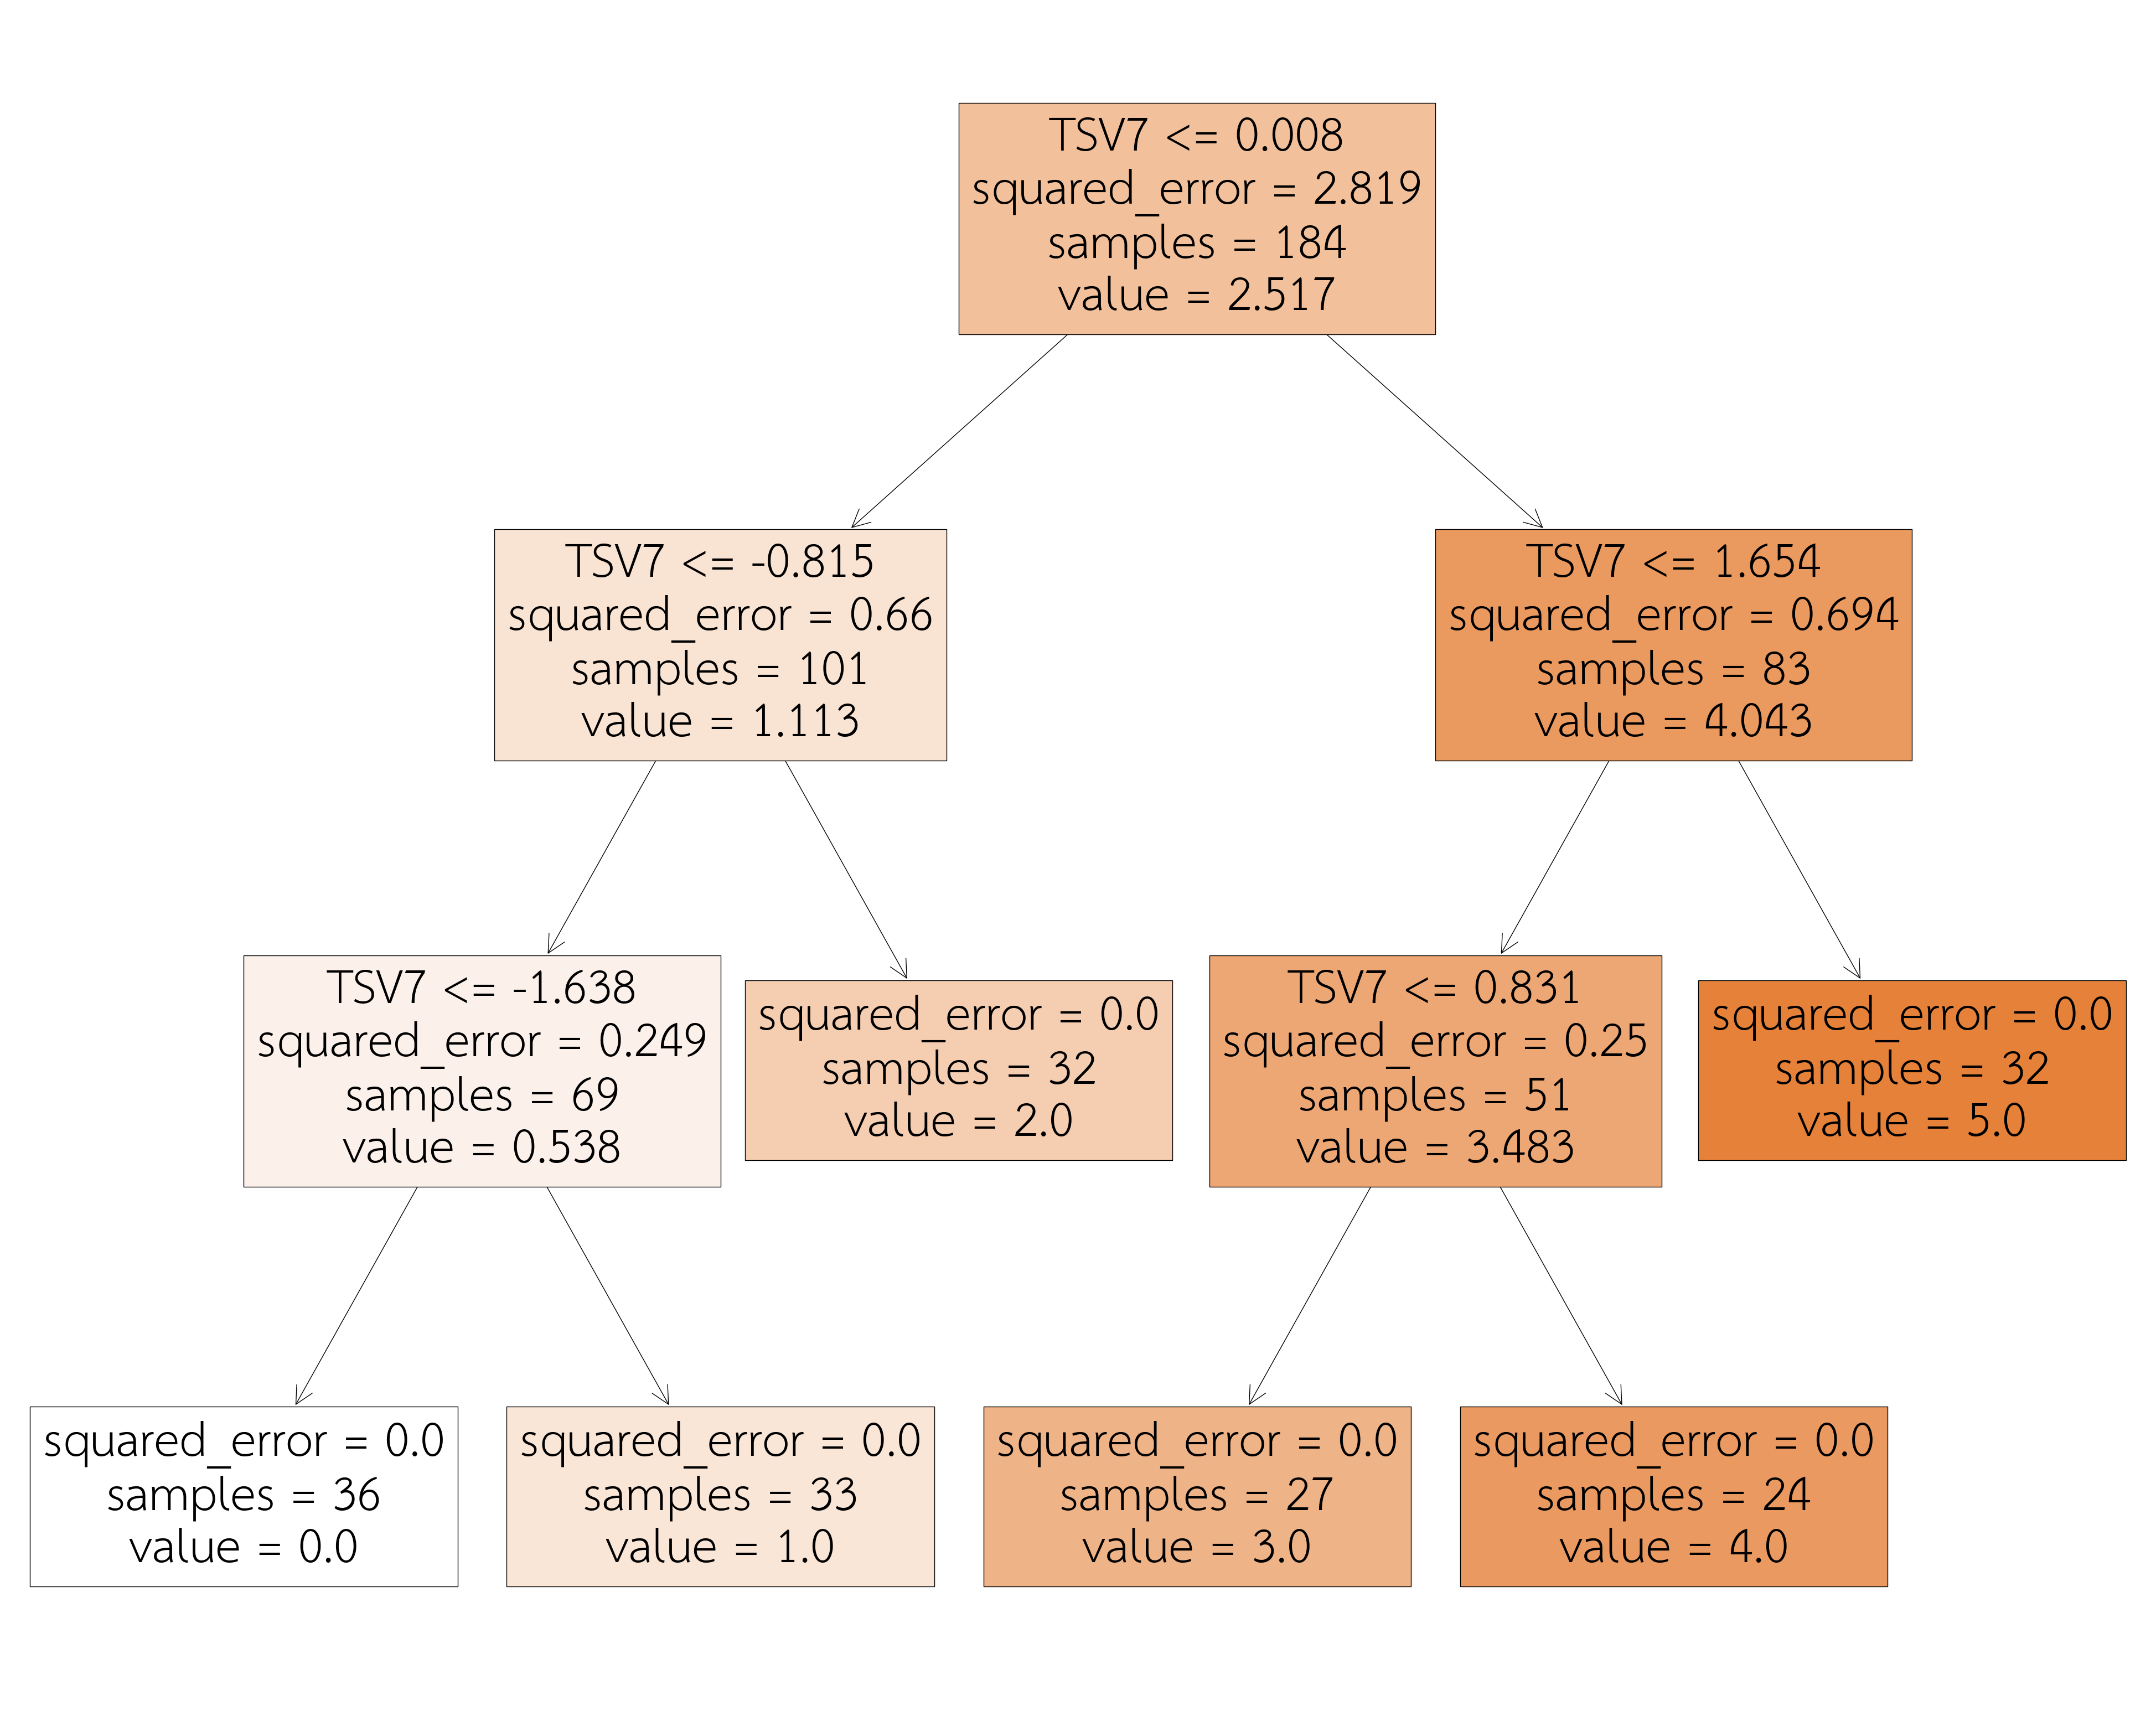

In [ ]:
plt.figure(figsize=(50,40))
_ = tree.plot_tree(rdf_reg.estimators_[0], feature_names=X.columns, filled=True)

###SHAP

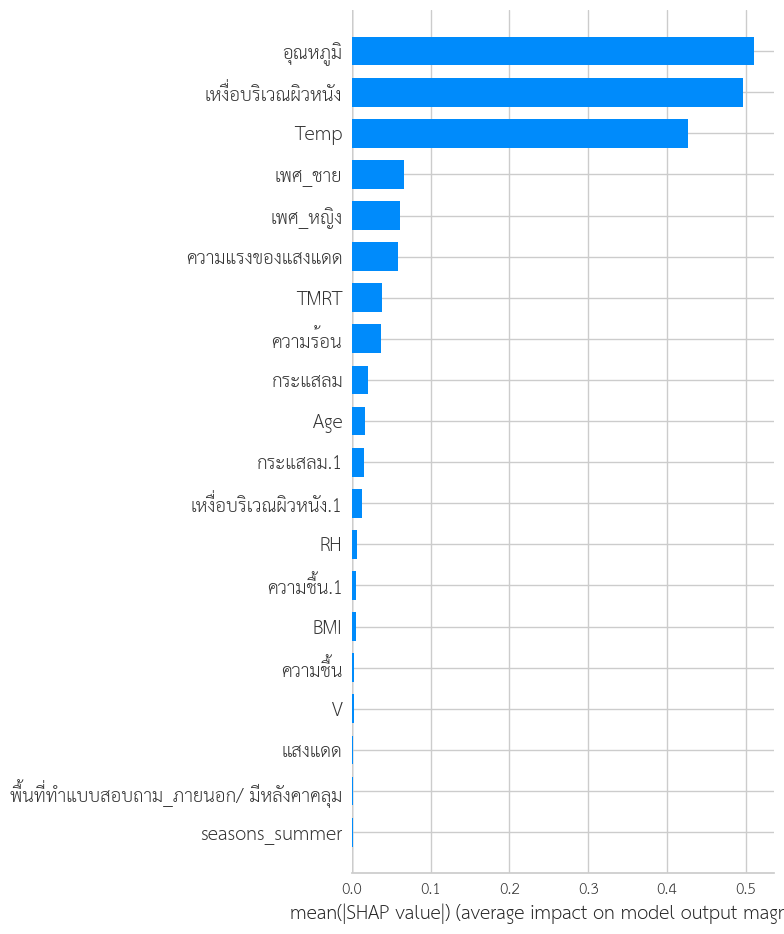

In [ ]:
# SHAP Interpreter
shapExplainer = shap.TreeExplainer(resultss)
shapValues = shapExplainer.shap_values(X_train_res)

# Explainer details
shapExplainer.__dict__

# Summary features contribute in model
shap.summary_plot(shapValues, X_train_res, plot_type = 'bar')

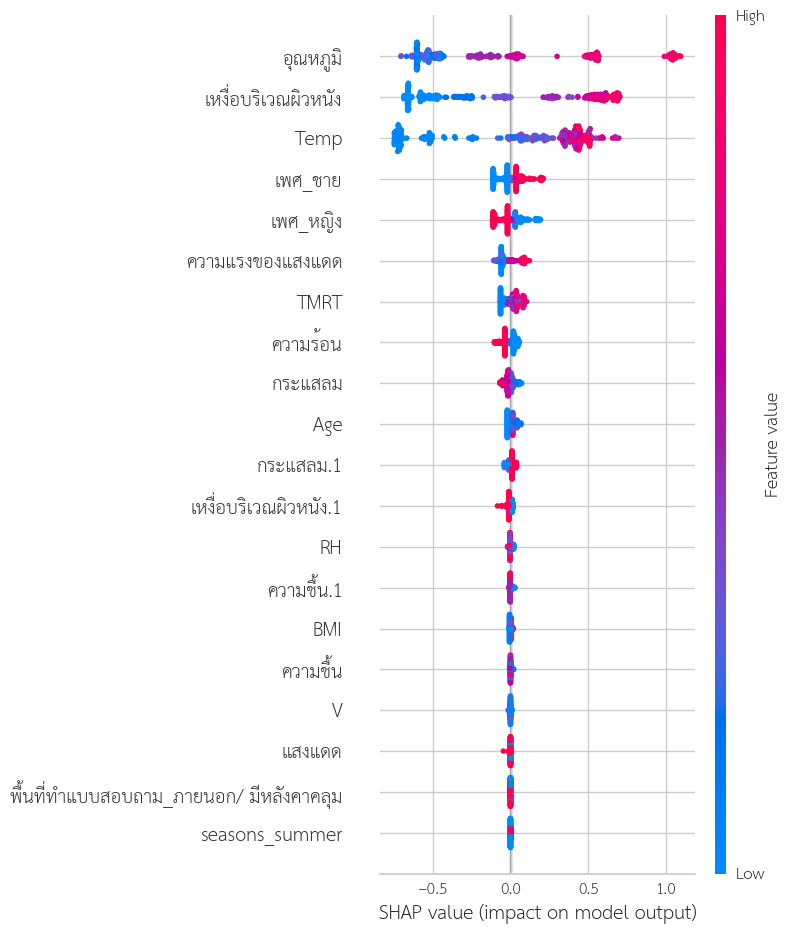

In [ ]:
shap.summary_plot(shapValues, X_train_res)

###PDP

<Axes: >

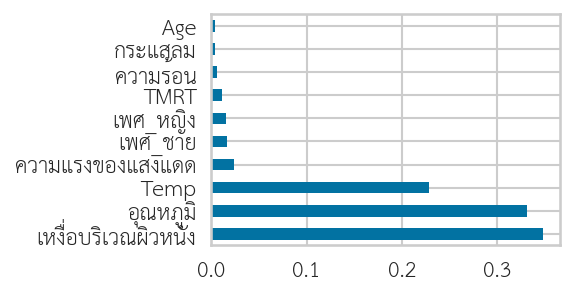

In [ ]:
fig, ax = plt.subplots(figsize=(3, 2), dpi=150)
pd.Series(resultss.feature_importances_, index=X.columns)\
    .nlargest(10)\
    .plot(kind='barh', ax=ax)

In [ ]:
base_features = [ 'อุณหภูมิ', 'เหงื่อบริเวณผิวหนัง', 'Temp']

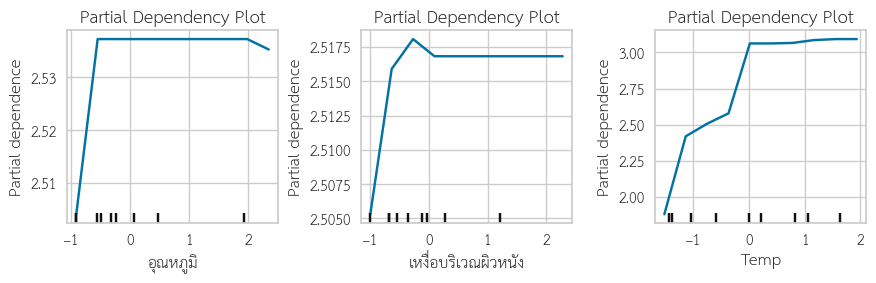

In [ ]:
n_cols = len(base_features)  # จำนวนคอลัมน์ตามจำนวน features
fig, axs = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols * 3, 3))  # ปรับขนาดให้เหมาะสม

for i, bf in enumerate(base_features):
    PartialDependenceDisplay.from_estimator(
        resultss,
        X_train_res,
        features=[bf],
        feature_names=base_features,
        grid_resolution = 10,
        ax=axs[i]  # ใช้ axis ที่ i
    )
    axs[i].set_title("Partial Dependency Plot")

plt.tight_layout()
plt.show()